In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_array = cv2.imread("Test_Dataset/Closed_Eyes/s0002_00003_0_0_0_0_0_01.png",cv2.IMREAD_GRAYSCALE)

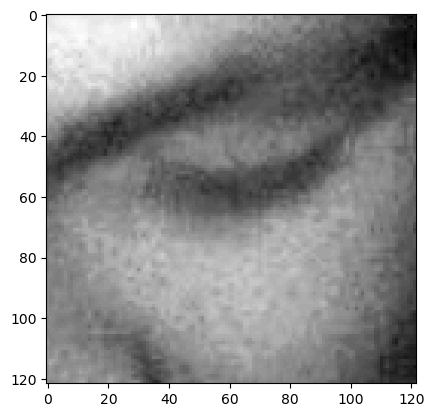

In [3]:
plt.imshow(img_array,cmap="gray")

In [4]:
img_array.shape

(122, 122)

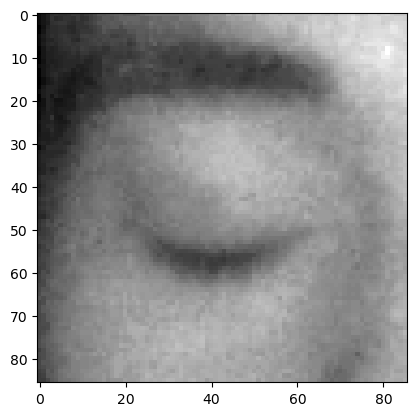

In [5]:
Datadirectory = "Test_Dataset"
Classes = ["Closed_Eyes","Open_Eyes"]
for category in Classes:
    path = os.path.join(Datadirectory , category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array,cmap = "gray")
        plt.show()
        break
    break
        
    

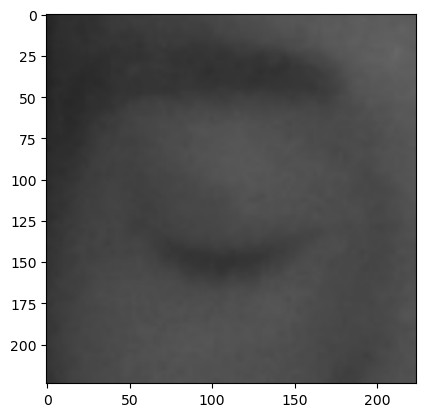

In [6]:
img_size = 224
new_array = cv2.resize(backtorgb, (img_size,img_size))
plt.imshow(new_array, cmap = "gray")
plt.show()

# Reading all the images and coverting them into an array for data and labels


In [7]:
training_Data=[]

def create_training_Data():
    for category in Classes:
        path=os.path.join(Datadirectory,category)
        class_num=Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                backtorgb=cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array=cv2.resize(backtorgb,(img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [8]:
create_training_Data()

In [9]:
print(len(training_Data))

3061


In [10]:
import random

random.shuffle(training_Data)

In [11]:
X=[]
y=[]
for features,label in training_Data:
    X.append(features)
    y.append(label)
    
X=np.array(X).reshape( -1 , img_size , img_size,3)

In [12]:
X.shape

(3061, 224, 224, 3)

In [13]:
X = X/255.0;


In [14]:
Y = np.array(y)

In [16]:
import pickle

pickle_out=open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()



In [17]:
pickle_in=open("X.pickle","rb")
X=pickle.load(pickle_in)

pickle_in=open("y.pickle","rb")
y=pickle.load(pickle_in)

# Deep learning model for training - Training Learning

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [19]:

model=tf.keras.applications.mobilenet.MobileNet()
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

# Transfer Learning

In [20]:
base_input=model.layers[0].input

In [21]:
base_output=model.layers[-4].output

In [22]:
Flat_layer=layers.Flatten()(base_output)
final_output=layers.Dense(1)(Flat_layer)
final_output=layers.Activation('sigmoid')(final_output)

In [23]:
new_model=keras.Model(inputs=base_input,outputs=final_output)



In [24]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

# Settings for binary classification (Open/Closed)

In [25]:
new_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])



In [26]:
new_model.fit(X,Y,epochs=1,validation_split=0.1)


87/87 [==============================] - 411s 5s/step - loss: 0.0763 - accuracy: 0.9793 - val_loss: 5.7835 - val_accuracy: 0.5700


In [27]:
new_model.save('my_model.h5')

# Checking network for predictions

In [28]:
img_array=cv2.imread("Test_Dataset\Closed_Eyes\s0001_00001_0_0_0_0_0_01.png",cv2.IMREAD_GRAYSCALE)
backtorgb=cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array=cv2.resize(backtorgb,(img_size,img_size))

In [29]:
X_input=np.array(new_array).reshape(1,img_size,img_size,3)

In [30]:
X_input.shape

(1, 224, 224, 3)

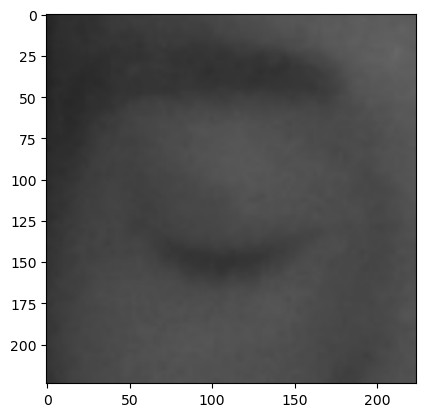

In [31]:
plt.imshow(new_array)

In [32]:
X_input=X_input/255.0

In [33]:
prediction=new_model.predict(X_input)

1/1 [==============================] - 1s 787ms/step


In [34]:
prediction


array([[3.0608993e-09]], dtype=float32)

# Let's check on unknown images

In [35]:
img = cv2.imread('sad_woman2.JPG')

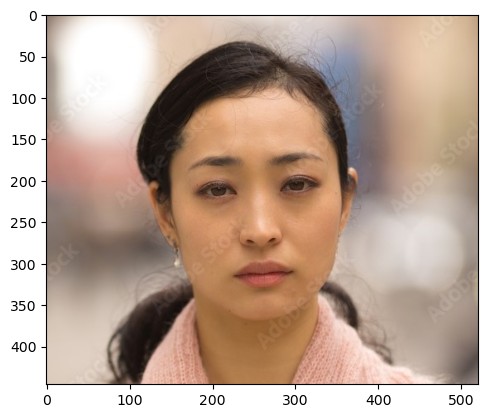

In [36]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))


In [37]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [38]:
eye_cascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [39]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [40]:
eyes = eye_cascade.detectMultiScale(gray,1.1,4) 

In [41]:
for (x, y, w, h) in eyes:
    cv2.rectangle(img, (x,y), (x+w,y+h), (0, 255, 0), 2)

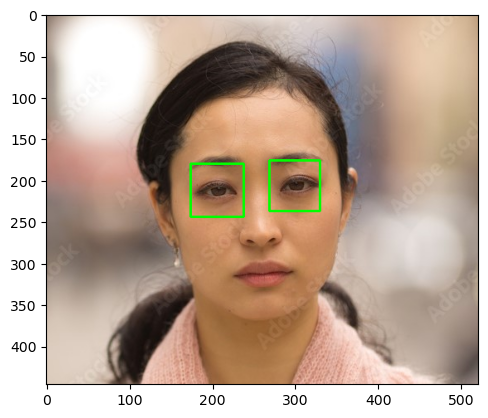

In [42]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# CROPPING THE EYE IMAGE


In [43]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#print(faceCascade.empty())   
eyes = eye_cascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print("Eyes are not detected")
    else:
        for (ex,ey,ew,eh) in eyess:
            eyes_roi = roi_color[ey: ey+eh,ex:ex +ew]

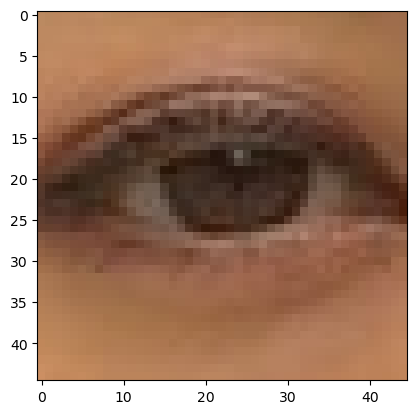

In [44]:
plt.imshow(cv2.cvtColor(eyes_roi,cv2.COLOR_BGR2RGB))


In [45]:
eyes_roi.shape

(45, 45, 3)

In [46]:
final_image = cv2.resize(eyes_roi,(224,224))
final_image = np.expand_dims(final_image,axis=0) ## need fourth dimension
final_image = final_image/255.0

In [47]:
final_image.shape

(1, 224, 224, 3)

In [48]:
new_model.predict(final_image)

1/1 [==============================] - 0s 82ms/step


array([[4.495493e-10]], dtype=float32)

# REALTIME VIDEO DEMO

# FIRST detect that eyes are closed or open


In [ ]:
import cv2 ### pip install opencv-python
## pip install opencv-contrib-python   fullpackage
# from deepface import deepface ## pip install deepface

path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)

# Check if the webcam is opened correctly
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
while True:
    ret,frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    #PRINT (facecascade.empty())
    eyes=eye_cascade.detectMultiScale(gray,1.1,4)
    
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color= frame[y:y+h, x:x+w]
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("eyes are not detected")
        else:
            for (ex,ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey: ey+eh,ex:ex +ew]
            
    final_image = cv2.resize(eyes_roi,(224,224))
    final_image = np.expand_dims(final_image,axis=0)  ## need fourth dimension
    final_image = final_image/255.0
    
    Predictions = new_model.predict(final_image)
    if (Predictions > 0):
        status = 'Open Eyes'
    else:
        status = 'Closed Eyes'
        
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    
    # Draw a rectangle around the face
    
    for (x,y,w,h)in faces:
        cv2.rectangle(frame,(x,y),(x+w , y+h),(0,255,0),2)
        
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    #use putText() method for inserting text in video
    
    cv2.putText(frame,
               status,
               (50,50),
               font,3,
               (0,0,255),
               2,
               cv2.LINE_4)
    cv2.imshow('Drowsiness Detection Tutorial',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 66ms/step
False
1/1 [==============================] - 0s 93ms/step
False
1/1 [==============================] - 0s 77ms/step
False
1/1 [==============================] - 0s 79ms/step
False
1/1 [==============================] - 0s 55ms/step
False
1/1 [==============================] - 0s 64ms/step
False
1/1 [==============================] - 0s 73ms/step
False
1/1 [==============================] - 0s 104ms/step
False
1/1 [==============================] - 0s 72ms/step
False
1/1 [==============================] - 0s 73ms/step
False
1/1 [==============================] - 0s 72ms/step
False
1/1 [==============================] - 0s 76ms/step
False
1/1 [==============================] - 0s 67ms/step
False
1/1 [==============================] - 0s 68ms/step
False
1/1 [==============================] - 0s 102ms/step
False
1/1 [==============================] - 0s 61ms/step
False
1/1 [==============================] - 0s 66ms/step
False
1/1 [=======

# If eyes are closed for unusual time,like more than blinks,for few seconds,alarm Generated

In [ ]:
import winsound
frequency = 2500
duration = 1000
import numpy as np
import cv2

path = "haarcascade_frontalface_default.xml"

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


cap = cv2.VideoCapture(1)
# Check if the webcam is opened correctly

if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError(" Cannot open webcam")
counter = 0
while True:
    ret,frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2,data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    #PRINT (facecascade.empty())
    
    eyes=eye_cascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color= frame[y:y+h, x:x+w]
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("eyes are not detected")
        else:
            for (ex,ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey: ey+eh,ex:ex +ew]
        
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    
    
     # Draw a rectangle around the face
    
    for (x,y,w,h)in faces:
        cv2.rectangle(frame,(x,y),(x+y , y+h),(0,255,0),2)
    font = cv2.FONT_HERSHEY_SIMPLEX
                
                
    final_image = cv2.resize(eyes_roi,(224,224))
    final_image = np.expand_dims(final_image,axis=0) ## need fourth dimension
    final_image = final_image/255.0
    
    Predictions =new_model.predict(final_image)
    if (Predictions>0):
        status = 'Open Eyes'
        cv2.putText(frame,
               status,
               (50,50),
               font,3,
               (0,0,255),
               2,
               cv2.LINE_4)
        x1,y1,w1,h1=0,0,175,75
        
        
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        #add text
        cv2.putText(frame,'Active',(x1+int(w1/10),y1 + int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,0),2)
        
        
        
        
    else:
        counter = counter +1
        status = 'Closed Eyes'
        cv2.putText(frame,
               status,
               (150,150),
               font,3,
               (0,0,255),
               2,
               cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),2)
        if counter>5:
            x1,y1,w1,h1=0,0,175,75
            # draw black background rectangle
            cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
            # add text
            cv2.putText(frame, 'Sleep Alert !!',(x1 + int(w1/10),y1 + int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
            winsound.Beep(frequency,duration)
            counter = 0
            
    #use putText() method for inserting text in video
    
    cv2.imshow('Drowsiness Detection Tutorial',frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
